In [33]:
# Import necessary libraries for data manipulation, analysis, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Read the CSV file containing Seattle weather data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')
data.sample(5)

,date,precipitation,temp_max,temp_min,wind,weather
314,2012-11-10,0.0,7.8,-0.6,2.2,sun
1009,2014-10-06,0.0,25.6,13.3,2.5,fog
141,2012-05-21,14.0,16.7,10.0,4.0,rain
101,2012-04-11,2.3,11.1,7.2,2.6,rain
1325,2015-08-18,0.0,30.0,15.0,3.0,sun


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Create a new DataFrame from the data
df = pd.DataFrame(data)
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [37]:
# Display summary statistics of the DataFrame, including all columns
df.describe(include ="all")

,date,precipitation,temp_max,temp_min,wind,weather
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,NaN,5
top,2012-01-01,NaN,NaN,NaN,NaN,rain
freq,1,NaN,NaN,NaN,NaN,641
mean,NaN,3.029432,16.439083,8.234771,3.241136,NaN
std,NaN,6.680194,7.349758,5.023004,1.437825,NaN
min,NaN,0.000000,-1.600000,-7.100000,0.400000,NaN
25%,NaN,0.000000,10.600000,4.400000,2.200000,NaN
50%,NaN,0.000000,15.600000,8.300000,3.000000,NaN
75%,NaN,2.800000,22.200000,12.200000,4.000000,NaN


 # Data cleaning

In [38]:
# Display concise summary of the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [39]:
# Count the number of missing values in each column
df.isna().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


# Separate object and float columns and describe both of them

In [40]:
# Separate object (categorical) and float (numerical) columns for separate analysis
df_float= df.select_dtypes(['float64'])
df_object = df.select_dtypes(['object'])

In [41]:
# Display summary statistics for float columns
df_float.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [42]:
# Display summary statistics for object columns
df_object.describe()

,date,weather
count,1461,1461
unique,1461,5
top,2012-01-01,rain
freq,1,641


In [43]:
# Display the first 10 rows of the DataFrame
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [44]:
# Display the last 10 rows of the DataFrame
df.tail(10)

,date,precipitation,temp_max,temp_min,wind,weather
1451,2015-12-22,4.6,7.8,2.8,5.0,rain
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain
1454,2015-12-25,5.8,5.0,2.2,1.5,rain
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


# Line up time

In [45]:
# Sort the DataFrame by date to line up time correctly
df.sort_values(by=["date"])
df


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [46]:
# Convert the 'date' column to datetime format and set it as the index of the DataFrame
df['date'] = df['date'].apply(pd.to_datetime)
df.set_index('date',inplace=False)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [47]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [48]:
# Drop rows with missing values to create a clean dataset
df1 = df.dropna()
df1

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# Charts

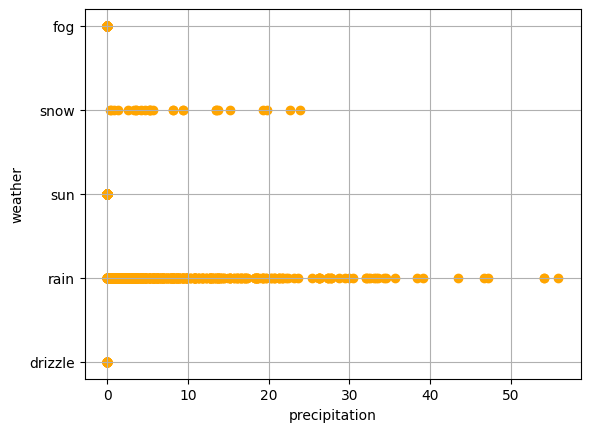

In [21]:
# Create a scatter plot of precipitation vs weather
plt.scatter(df1["precipitation"] , df1["weather"] , color= "orange")
plt.xlabel("precipitation")
plt.ylabel("weather")
plt.grid()

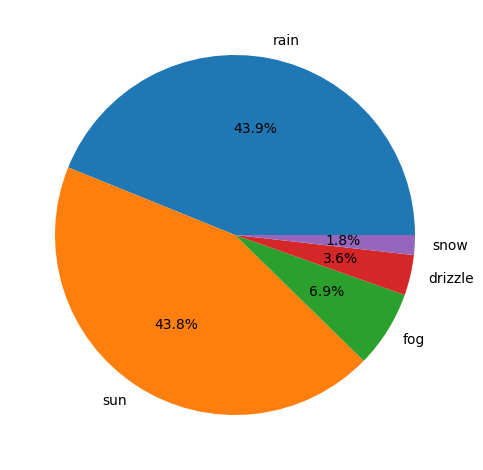

In [22]:
# Group the data by weather, count occurrences, and sort by precipitation
df1 = df.groupby(pd.Grouper(key = "weather")).count().reset_index()
df1 = df1.sort_values(by = 'precipitation' , ascending = False).iloc[:40]
fig, ax = plt.subplots()
ax.pie(df1["precipitation"], labels=df1["weather"], autopct='%1.1f%%')
plt.tight_layout()

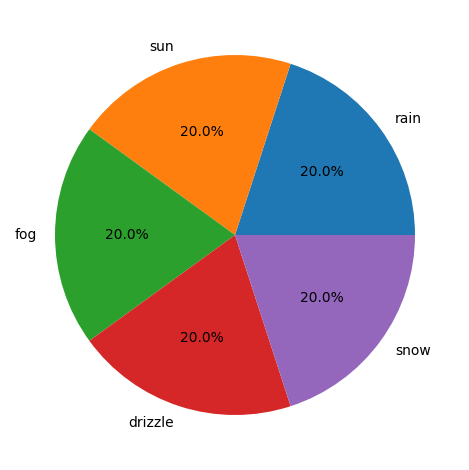

In [ ]:
# Group the top locations by weather and temperature max
grouped_df1 = df1.groupby(pd.Grouper(key="weather")).count().reset_index()
top_locations = grouped_df1.sort_values(by='temp_max', ascending=False).iloc[:15]
fig, ax = plt.subplots()
ax.pie(top_locations["temp_max"], labels=top_locations["weather"], autopct='%1.1f%%')
plt.tight_layout()
plt.grid()

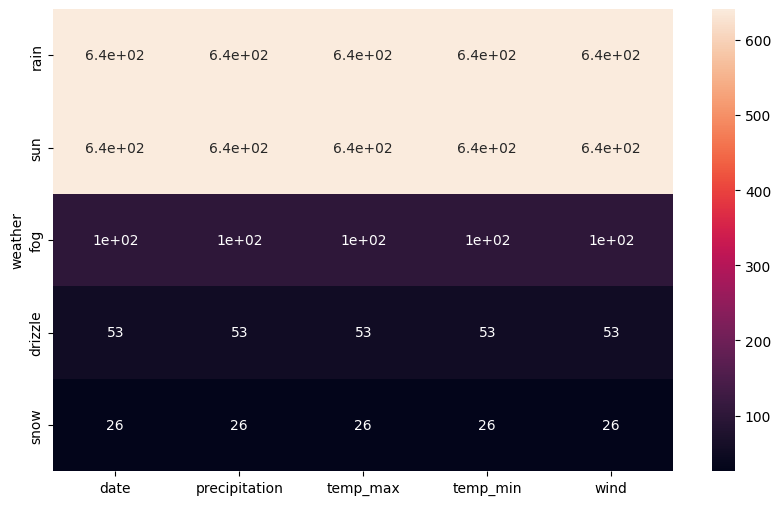

In [26]:
# Create a heatmap of the top weather features
map_df1 = df1.set_index('weather')
temp=map_df1.iloc[:20,:]
map_df2 = temp.loc[:,['date','precipitation','temp_max','temp_min'
                      ,'wind']]

plt.figure(figsize=(10,6))
sns.heatmap(data=map_df2, annot=True)
plt.show()

In [27]:
# Import Plotly for interactive plots
import plotly.express as px

In [50]:
# Create a histogram of wind counts
fig = px.histogram(df, x="wind",  template = 'plotly', title = ' wind- Count',
                     text_auto = True,  opacity=0.8)
fig.update_layout(bargap=0.2)
fig.show()

In [31]:
# Import Plotly Graph Objects for more customization
import plotly.graph_objects as go

In [49]:
df1 = df.iloc[ :100 , : ]
df1

labels = df1['weather']
values =df1['precipitation']
fig = go.Figure(data = [go.Pie(labels = labels , values = values ,
         textinfo = 'label+percent' , hole = 0.3 , pull = [.1, 0, 0, 0])])
fig.show()